<a href="https://colab.research.google.com/github/ulat/HTL_TdoT_RL/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
from random import randint

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
batch_size = 128
num_classes = 10
epochs = 120

In [0]:
img_rows, img_cols = 28, 28

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# One hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/120
60000/60000 [==============================] - 13s 219us/step - loss: 0.2586 - acc: 0.9200 - val_loss: 0.0608 - val_acc: 0.9808
Epoch 2/120
60000/60000 [==============================] - 9s 149us/step - loss: 0.0875 - acc: 0.9742 - val_loss: 0.0461 - val_acc: 0.9844
Epoch 3/120
60000/60000 [==============================] - 9s 149us/step - loss: 0.0664 - acc: 0.9804 - val_loss: 0.0351 - val_acc: 0.9885
Epoch 4/120
60000/60000 [==============================] - 9s 149us/step - loss: 0.0559 - acc: 0.9833 - val_loss: 0.0346 - val_acc: 0.9884
Epoch 5/120
60000/60000 [==============================] - 9s 150us/step - loss: 0.0495 - acc: 0.9851 - val_loss: 0.0315 - val_acc: 0.9900
Epoch 6/120
60000/60000 [==============================] - 9s 148us/step - loss: 0.0443 - acc: 0.9866 - val_loss: 0.0300 - val_acc: 0.9905
Epoch 7/120
60000/60000 [==============================] - 9s 149us/step - loss: 0.0391 - acc: 0.9883 - val_loss: 0

KeyboardInterrupt: ignored

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02645204646150414
Test accuracy: 0.9924


In [0]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(x_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

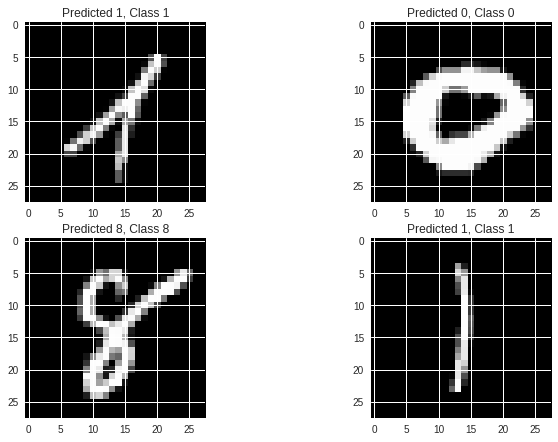

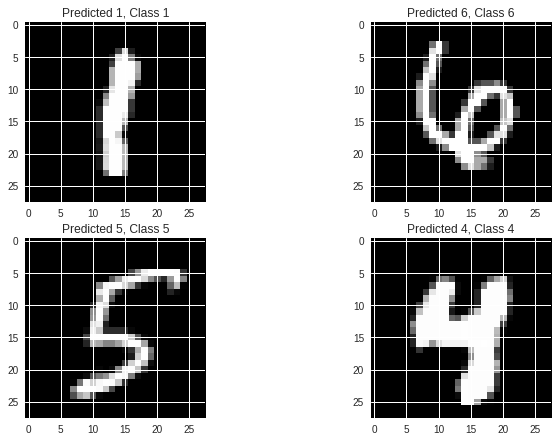

In [60]:
cor_idx = [randint(0, len(correct_indices)) for _ in range(4)]
inc_idx = [randint(0, len(incorrect_indices)) for _ in range(4)]
plt.figure()
for i, correct in enumerate(cor_idx):
    plt.subplot(2,2,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.2)
    
plt.figure()
for i, incorrect in enumerate(inc_idx):
    plt.subplot(2,2,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.2)

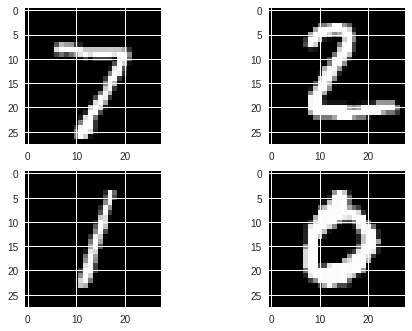

In [36]:
nb_images = 4

(X_train, y_train), (X_test, y_test) = mnist.load_data()
idx = [randint(0, len(X_test)) for i in range(nb_images)]

# plot 4 images as gray scale
                                                        
for i in range(nb_images):
  plt.subplot(221+i)
  plt.imshow(X_test[i], cmap=plt.get_cmap('gray'), label='2')  
# show the plot
plt.show()